## F10.7 comparison

This notebook compares F10.7 values form `AUX_IMF_2_` (OMNI daily averages) and `AUX_F10_2_`.

In [2]:
# load data from VirES server
from eoxmagmod.data import CHAOS6_CORE_LATEST as CUSTOM_SHC_FILE
from viresclient import SwarmRequest

### Step 1. Data retrieval

In [3]:
try:
    request = SwarmRequest() # new request object
    #request = SwarmRequest(url="https://vires.services/ows") # new request object
    #request = SwarmRequest(url="https://vires.services/ows", token="...") # new request object

    request.set_collection("SW_OPER_MAGA_LR_1B")  # colletion form which the data are retrieved
    request.set_products(
        measurements=[],     # requested measurement (none)
        auxiliaries=['F10_INDEX', 'F107',],  # requested auxialiary data (F10.7)
        sampling_step="PT1M",       # 1 second sampling
    )

    data = request.get_between(
        start_time="2016-01-01T00:00:00Z",
        end_time="2016-06-01T00:00:00Z"
    ).as_xarray()
except Exception as error:
    print("ERROR: ", error)
else:
    print(data)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:09, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (10.776MB)


<xarray.Dataset>
Dimensions:     (Timestamp: 218880)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01 ... 2016-05-31T23:59:00
Data variables:
    Spacecraft  (Timestamp) <U1 'A' 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Latitude    (Timestamp) float64 -72.5 -76.28 -80.01 ... 69.44 65.61 61.78
    Longitude   (Timestamp) float64 92.79 95.03 99.1 ... -127.1 -126.1 -125.4
    Radius      (Timestamp) float64 6.834e+06 6.834e+06 ... 6.814e+06 6.814e+06
    F10_INDEX   (Timestamp) float64 95.1 95.1 95.1 95.1 ... 89.0 89.0 89.0 89.0
    F107        (Timestamp) float64 96.57 96.57 96.57 96.57 ... 86.5 86.5 86.5


### Step 2. Visualization

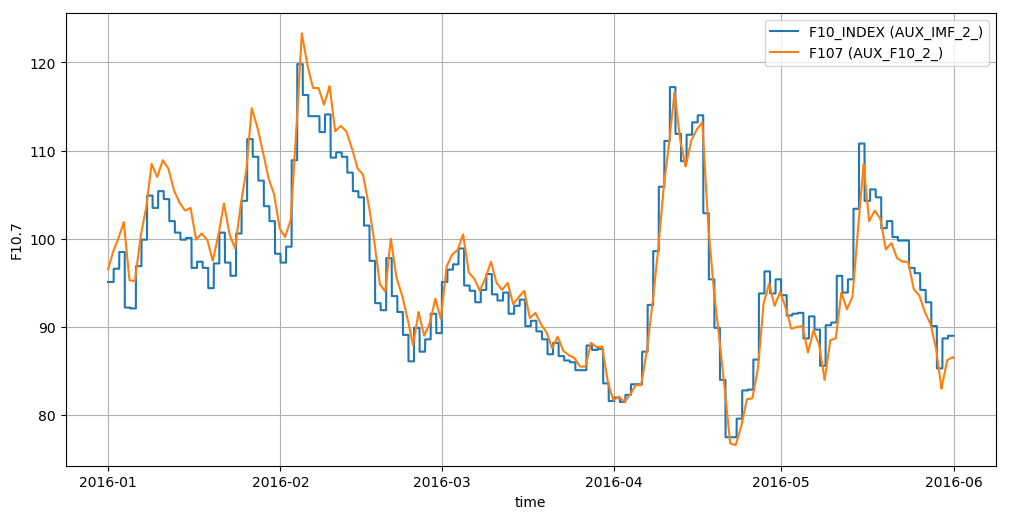

In [5]:
from matplotlib.pyplot import figure, subplot, show


time = data["Timestamp"].values
f107_imf = data["F10_INDEX"].values # AUX_IMF_2_ (OMNY daily average)
f107_f10 = data["F107"].values      # AUX_F10_2_ (observed F10.7)

fig = figure(figsize=(12, 6), dpi=100)
ax = subplot(111)
ax.plot(time, f107_imf, label="F10_INDEX (AUX_IMF_2_)")
ax.plot(time, f107_f10, label="F107 (AUX_F10_2_)")
ax.grid()
ax.set_xlabel('time')
ax.set_ylabel('F10.7')
ax.legend()
show()